# Logit Response Dynamics

**Yuya Furusawa**

*Graduate School of Economics, University of Tokyo*

This notebook demonstrates how to study logit best response dynamics model using the `logitdyn` Python library.

In [1]:
import numpy as np
import quantecon.game_theory as gt
import matplotlib.pyplot as plt

## Logit Response Dynamics

Logit response dynamics model is one of the learning models.
There is much literature that studies the learning in games, for example, fictitious play, (myopic) best response dynamics, Kamdori-Mailath-Rob, sampling best response models.
Please refer these notes:
- fictitious play
- best response dynamics

The learning model with random mistakes, including KMR model, is criticised by the absense of the foundation of mistakes.

In contrast, **Logit response dynamics**, which incorporates the random mistakes, is based on a theory about the origin of mistakes.

### Model

Let $\Gamma = (I, {(S_i, u_i)}_{i \in I})$ be a finite normal form game.
- $I=\{1,\ldots,N\}$ : player set
- $S_i$ : strategies set ($S$ : pure strategy profile)
- $u_i$ : payoff function
Denote $s=(s_i, s_{-i}) \in S$ and $u_i(s_i, s_{-i})=u_i(s)$.

Players behave as myopic best replier, but have mistakes in thier decisions.
A player is chosen to update her action given other players' actions every period (**asynchronous learning**).

When player $i$ is chosen, she will update her action to $s_i$ given actions $s_{-i}$.
The probability of choosing action $s_i$ is given by **logit choice function** :
$$
    p_i(s_i, s_{-i}) = \frac{\exp(\beta u_i(s_i, s_{-i}))}{\sum_{s_i' \in S_i} \exp(\beta u_i(s_i', s_{-i}))}
$$
where $0 < \beta < \infty$.

$\beta$ can be interpreted as an inverse measure of the level of noise in players' decisions.
As $\beta$ becomes larger, the size of noise becomes smaller.
From the microeconomic point of view, this modeling is based on a random-utility model, decision thoretic foundation.

Logit response dynamics can converge to the set of Nash equilibria in the potential game.
First, we introduce the definition of potential game.

**Definition(potential game)**

The $\Gamma$ is a *potential game* if there exists a function $\rho:S \rightarrow \mathbb{R}$ such that for all $i \in I$, $s_i, s_i' \in S_i$, $s_{-i} \in S_{-i}$,
$$
    u_i(s_i, s_{-i}) - u_i(s_i', s_{-i}) = \rho(s_i, s_{-i}) - \rho(s_i', s_{-i})
$$

$\rho$ is called the potential.

The following game is the potential game:

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 4, 4          |   0, 3   
 $B$           | 3, 0          |   2, 2     
 
To see this, the potential $\rho$ can be defined

1$\backslash$2 | $A$        | $B$ 
 ------------- |------------| ---------
 $A$           | 1          |   0  
 $B$           | 0          |   2     

(Note every $2 \times 2$ symmetric game is the potential game)

## Code

We see the convergence of the logit response dynamics in the potential game.

In [2]:
payoff = [[4,0],
          [3,2]]
beta = 4.0
ldy = gt.LogitDynamics(payoff, beta)

In [3]:
ts_length = 1000
init_actions = (0,0)
series = ldy.time_series(ts_length, init_actions)
seriesB = np.where(series==1, 1, 0)

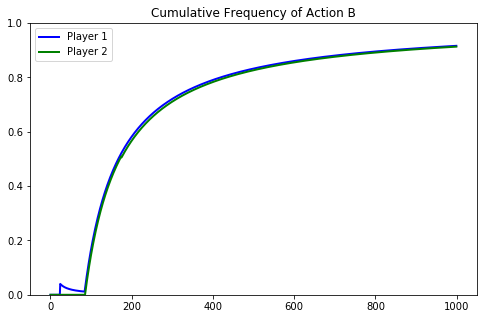

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
ax.plot(np.cumsum(seriesB[:, 0], axis=0)/np.arange(1,ts_length+1), linewidth=2, label="Player 1")
ax.plot(np.cumsum(seriesB[:, 1], axis=0)/np.arange(1,ts_length+1), linewidth=2, label="Player 2")
ax.set_ylim(0, 1)
plt.legend()
plt.title("Cumulative Frequency of Action B")
plt.show()

As you can see, (B,B) is a stable state of this dynamics, and this state maximizers of the potential $\rho$.

---

## Reference
- Alós-Ferrer, Carlos, and Nick Netzer. "The logit-response dynamics." Games and Economic Behavior 68.2 (2010): 413-427.